# Chapter 9

## Question 4

In which we run an SVM on simulated two-class data

### Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics

In [68]:
X1 = np.random.uniform(low=-10, high=+10, size=100)
# polynomial threshold
X2_Class1 = 1 + 2*X1[:50] + X1[:50]**2 + 0.1*X1[:50]**3 + np.random.uniform(low=10, high=50, size=50)
X2_Class2 = 1 + 2*X1[50:] + X1[50:]**2 + + 0.1*X1[50:]**3 - np.random.uniform(low=10, high=50, size=50)
X2 = np.concatenate([X2_Class1,X2_Class2])
Y = ["red"]*50 + ["blue"]*50
df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})


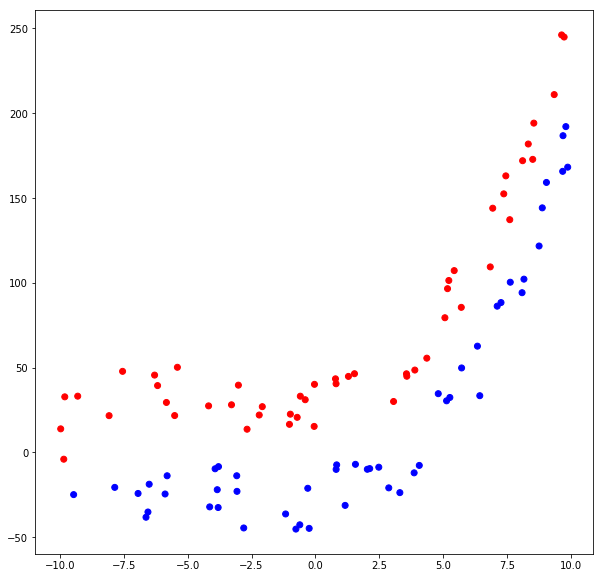

In [69]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter("X1", "X2", c="Y", data=df)

### Show that in this setting, an SVM with a polynomial kernel (d>1) or a radial kernel will output an SVC on the training data. Which technique performs best on the test data?

In [70]:
X = df.drop(columns="Y")
y = df.Y
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5)

Linear


/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.33999999999999997


ValueError: could not convert string to float: 'red'

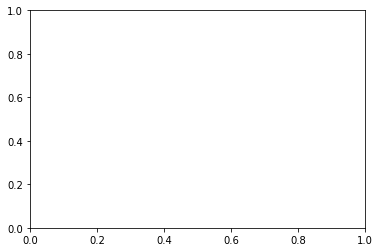

In [76]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


linear_svm = sklearn.svm.LinearSVC(max_iter=1e6)
polynomial_svm = sklearn.svm.SVC(kernel="poly", degree=3, gamma="auto")
radial_svm = sklearn.svm.SVC(kernel="rbf", gamma="auto")

for name, model in zip(["Linear", "Poly", "Radial"],[linear_svm, polynomial_svm, radial_svm]):
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = sklearn.metrics.zero_one_loss(y_test, y_pred)
    print(score)   
    fig, ax = plt.subplots()
    # title for the plots
    title = (f'Decision surface of {name}')
    # Set-up grid for plotting.
    X1, X2 = X.X1, X.X2
    xx, yy = make_meshgrid(X1, X2)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    colors = [0  if x == "Red" else 1 for x in y]
    ax.scatter(X1, X2, c=colors, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

Looks like the Polynomial kernel performs best. Plot to check